(500, 784)
int64
3


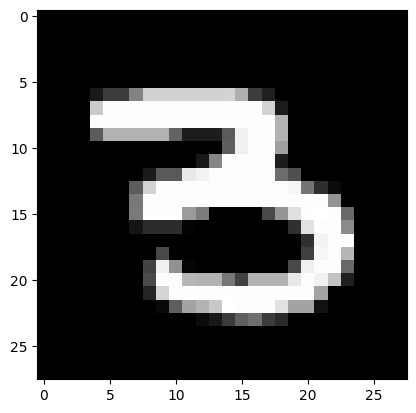

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.neighbors import KNeighborsClassifier
from segmentacion.otsu import thresholding

def loadDataset(fileName, samples):
    x = []
    y = []
    train_data = pd.read_csv(fileName)
    y = np.array(train_data.iloc[0:samples, 0])
    x = np.array(train_data.iloc[0:samples, 1:])
    return x,y
 
x,y=loadDataset("Nmist/mnist_test.csv",500)

print(x.shape)
print(x.dtype)
digit = x[50]
label = y[50]
print(label)
digit_pixels = digit.reshape(28, 28)

digit_pixels = digit_pixels.astype(np.uint8)

plt.imshow(digit_pixels, cmap='gray')
plt.show()

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.feature import hog

def loadDataset(fileName, samples):
    x = []
    y = []
    train_data = pd.read_csv(fileName)
    y = np.array(train_data.iloc[0:samples, 0])
    x = np.array(train_data.iloc[0:samples, 1:])
    return x,y
 
x,y=loadDataset("Nmist/mnist_test.csv",10000)

# Parámetros HOG
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

data = []

for i in range(len(x)):
    digit_pixels = x[i].reshape(28, 28)
    digit_pixels = digit_pixels.astype(np.uint8)
    features = hog(digit_pixels, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block)
    label = y[i]
    data.append(list(features) + [label])

columns = [f'HOG_{i}' for i in range(len(features))] + ['Label']
df = pd.DataFrame(data, columns=columns)

df



,HOG_0,HOG_1,HOG_2,HOG_3,HOG_4,HOG_5,HOG_6,HOG_7,HOG_8,HOG_9,...,HOG_135,HOG_136,HOG_137,HOG_138,HOG_139,HOG_140,HOG_141,HOG_142,HOG_143,Label
0,0.166356,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.075152,0.076573,...,0.000000,0.000000,0.000000,0.349542,0.349542,0.051727,0.000000,0.000000,0.000000,2
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.466095,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.215484,...,0.127743,0.268095,0.268095,0.201925,0.032593,0.000000,0.000000,0.000000,0.012571,0
3,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.332529,...,0.325917,0.239897,0.121811,0.053235,0.000000,0.000000,0.008672,0.060945,0.218709,4
4,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.371616,...,0.060090,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0.024861,0.110834,0.247521,0.0,0.024861,0.0,0.0,0.0,0.000000,0.000000,...,0.134930,0.116244,0.051992,0.109667,0.323290,0.323290,0.044149,0.054919,0.000000,2
9995,0.191220,0.084808,0.129723,0.0,0.065185,0.0,0.0,0.0,0.000000,0.001992,...,0.277099,0.162076,0.277099,0.063065,0.043618,0.000000,0.000000,0.000000,0.095486,3
9996,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.171505,...,0.041564,0.203371,0.149280,0.118823,0.061175,0.000000,0.000000,0.000000,0.000000,4
9997,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.192871,0.096163,0.111512,0.000000,0.001315,0.000000,0.000000,0.097834,0.047751,5


In [35]:
from sklearn.model_selection import train_test_split

# Dividir el DataFrame en características (X) y etiquetas (y)
X = df.drop('Label', axis=1)
y = df['Label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

# Crear un modelo KNN con un número de vecinos (k) específico
knn = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el valor de k

# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)
# Predecir etiquetas en el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar el rendimiento del modelo (por ejemplo, utilizando la precisión)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')



Precisión del modelo: 0.94


**SIN FUNCION**

(500, 784)
int64
2


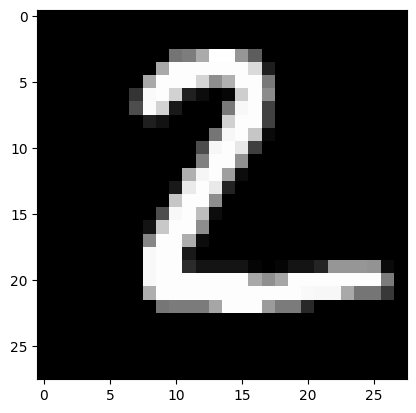

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def loadDataset(fileName, samples):
    x = []
    y = []
    train_data = pd.read_csv(fileName)
    y = np.array(train_data.iloc[0:samples, 0])
    x = np.array(train_data.iloc[0:samples, 1:])
    return x,y
 
x,y=loadDataset("Nmist/mnist_test.csv",500)

print(x.shape)
print(x.dtype)
digit = x[0]
label = y[0]
print(label)
digit_pixels = digit.reshape(28, 28)

digit_pixels = digit_pixels.astype(np.uint8)

plt.imshow(digit_pixels, cmap='gray')
plt.show()